In [22]:
import pandas as pd
import numpy as np
import seaborn as sns 
import pickle
import statistics as st
from scipy import stats
import matplotlib.pyplot as plt


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mosapabdelghany/medical-insurance-cost-dataset")

print("Path to dataset files:", path)

c:\Users\Xaris\Desktop\Project\Medical Insurance Cost\Medical-Insurance-Cost\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 16.0k/16.0k [00:00<00:00, 6.99MB/s]

Extracting files...
Path to dataset files: C:\Users\Xaris\.cache\kagglehub\datasets\mosapabdelghany\medical-insurance-cost-dataset\versions\1


In [9]:
df = pd.read_csv(r"C:\Users\Xaris\.cache\kagglehub\datasets\mosapabdelghany\medical-insurance-cost-dataset\versions\1\insurance.csv")
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


What does the meaning of its column (and the daat type of each feature) ?

age: Age of primary beneficiary (int)

sex: Gender of beneficiary (male, female)

bmi: Body Mass Index, a measure of body fat based on height and weight (float)

children: Number of children covered by health insurance (int)

smoker: Smoking status of the beneficiary (yes, no)

region: Residential region in the US (northeast, northwest, southeast, southwest)

charges: Medical insurance cost billed to the beneficiary (float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [46]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [12]:
df.shape

(1338, 7)

In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [42]:
df.duplicated().sum()

np.int64(1)

In [43]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,age,male,30.59,0,no,northwest,1639.5631


In [44]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,age,female,27.900,0,yes,southwest,16884.92400
1,age,male,33.770,1,no,southeast,1725.55230
2,age,male,33.000,3,no,southeast,4449.46200
3,age,male,22.705,0,no,northwest,21984.47061
4,age,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,age,male,30.970,3,no,northwest,10600.54830
1334,age,female,31.920,0,no,northeast,2205.98080
1335,age,female,36.850,0,no,southeast,1629.83350
1336,age,female,25.800,0,no,southwest,2007.94500


In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >]], dtype=object)

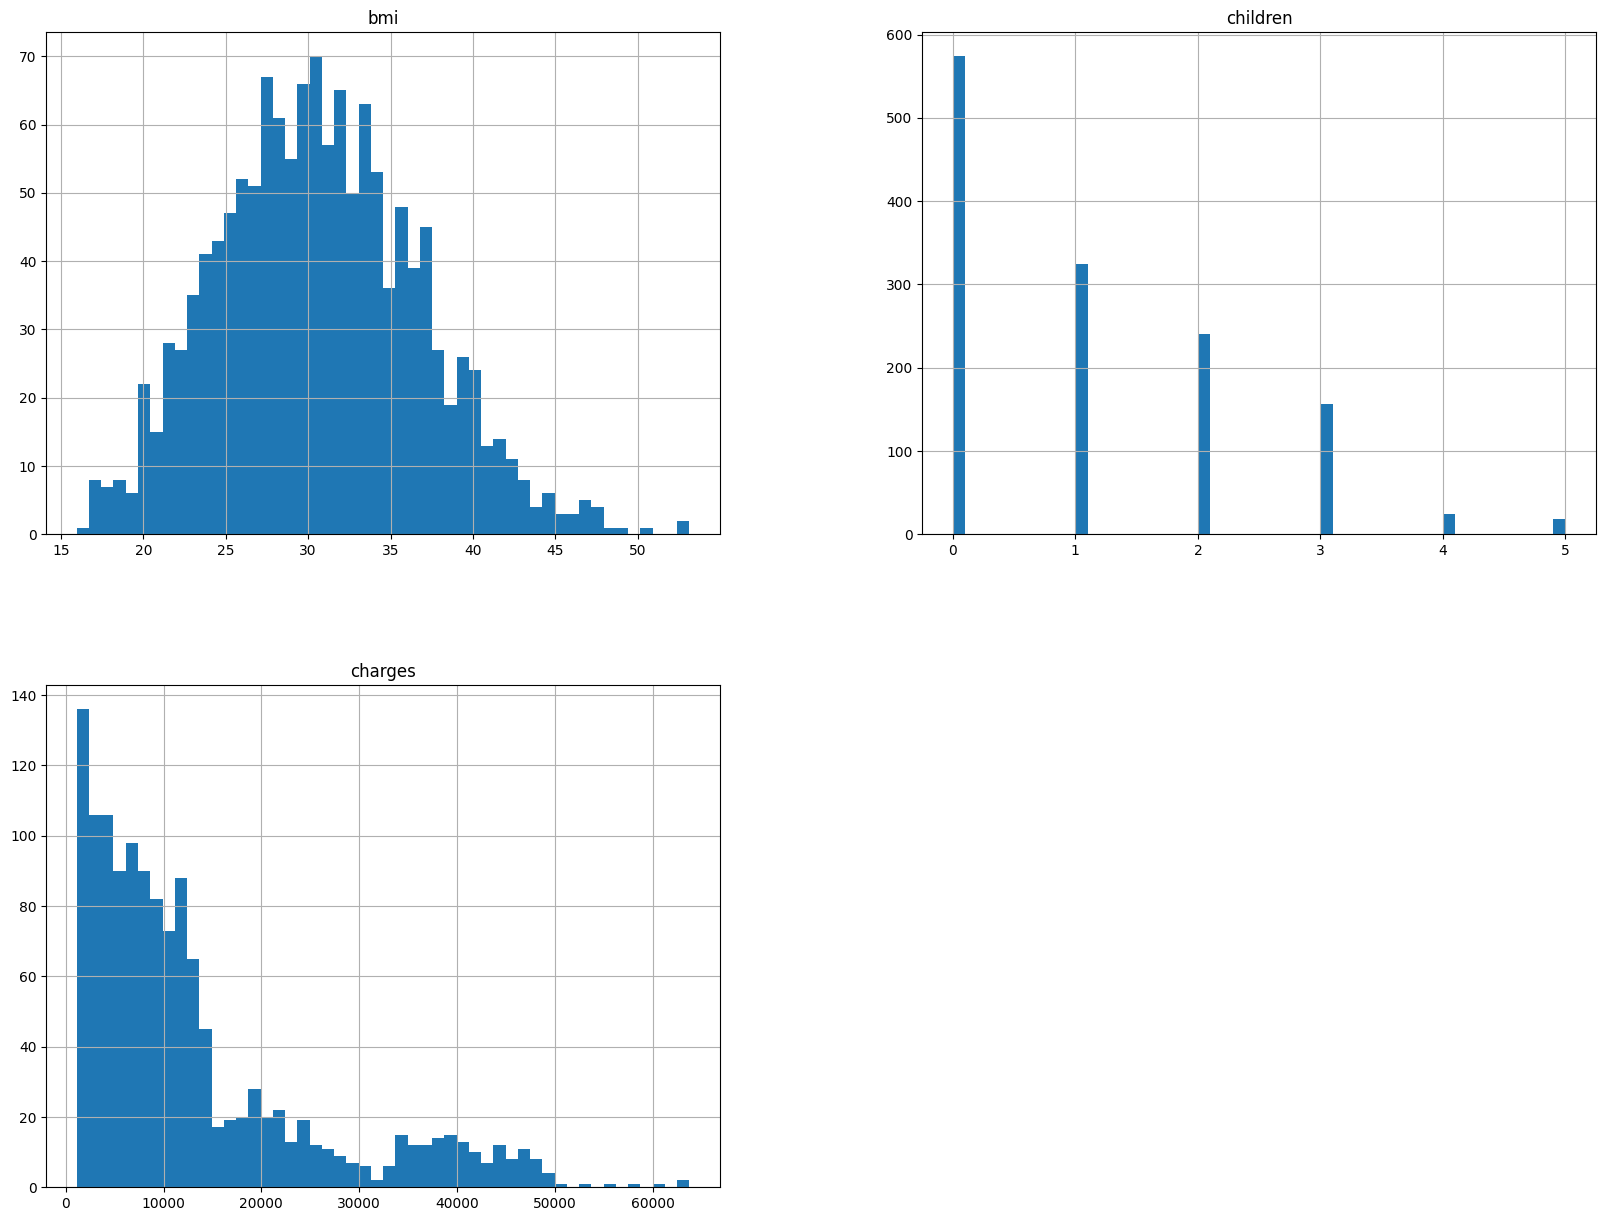

In [ ]:
df.hist(bins = 50,figsize = (20,15))

As we can see from the above diagramm adults has a quite high bmi prices. <br>
The BMI Categories for Adults are:<br>
Underweight: Below 18.5<br>
Normal Weight (Healthy): 18.5 to 24.9<br>
Overweight: 25.0 to 29.9<br>
Obese: 30.0 or above

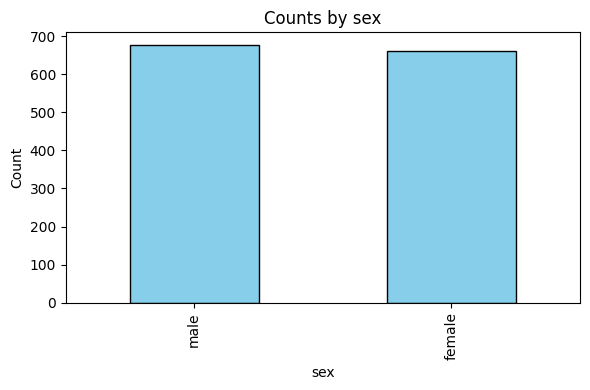

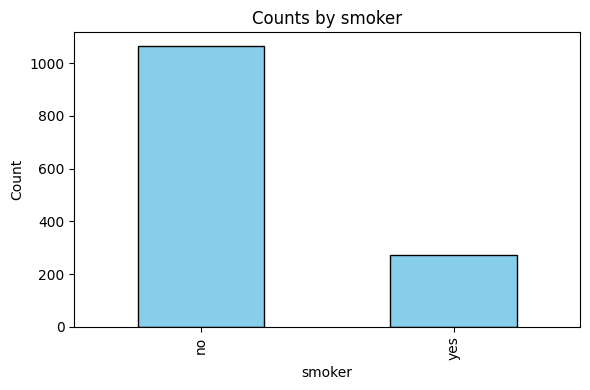

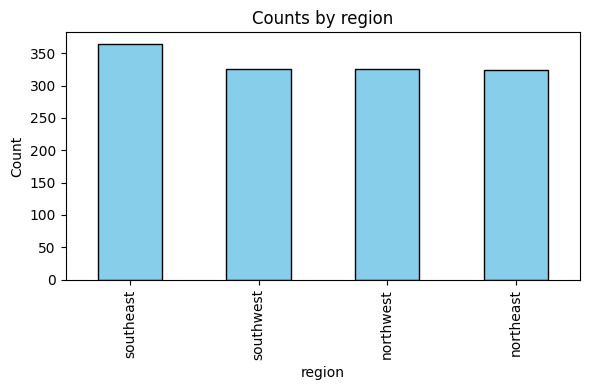

In [57]:
def plot_categorical(df:pd.DataFrame, col:str):
    counts = df[col].value_counts()
    plt.figure(figsize=(6,4))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Counts by {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

for col in ["sex", "smoker", "region"]:
    plot_categorical(df,col)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

transformer = ColumnTransformer(transformers =[ 
        ('t1',OneHotEncoder(),['sex']),
        ('t2',OneHotEncoder(),['smoker']),
        ('t3',OneHotEncoder(),['region'])
],remainder='passthrough')